Train Set: 
Shapes of each array of train patches before augmentation: 
CT shape: (80, 80, 759)
Labels shape: (759, 1)



Test set: 
Shapes of each array of test patches before augmentation: 
CT shape: (80, 80, 224)
Labels shape: (224, 1)


The Balance of the train set before augmentation: 

 Images with a high-risk stratification :271
 Images with a low-risk stratification :488




The Balance of the test set before augmentation: 

 Images with a high-risk stratification :34
 Images with a low-risk stratification :190


-----FAILED: c:/users/salch/pancreasCNN/data/augmentations Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/train Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/test Already exists


Shapes of each array of patches  after augmentation: 
Train CT Patches Array shape:

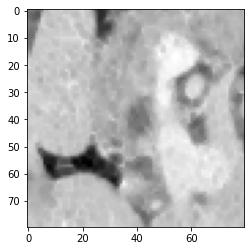

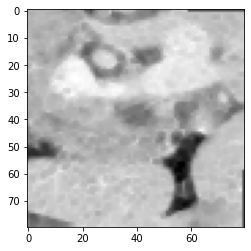

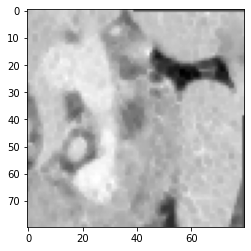

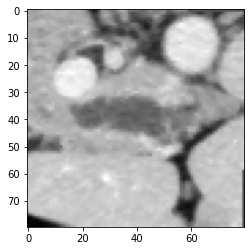

In [21]:
'''
Author: Sal Choueib
Student No. : 10188460
Class: CISC881
Description:



This script employes two transformation algorithms, rotation and zooming. For each algorithm, it is possible to execute the augmentation in 3 different methods:
complete (unbalanced), incomplete (balanced), and random (unbalanced). The complete method will apply a range of rotations or zoom magnifications
on all images regardless of the value of the images’ strafication label. Therefore it does not solve the data’s inherent imbalance. The incomplete method will
apply the same range of rotations or zoom magnifications as the complete method. However, this method is discriminative,
applying the augmentation to only every third image with a ClinSig value of 0. This way, it increase the number of positive data in comparison to negative data.
I chose every third negative image since the inherent imbalance shows approximately 3 times more negative data observations to positive observations.

Random rotation and zoom will apply one augmentation to each image by random choice of rotation angle or magnifications from range. After augmentation, the augmentated
images are saved as numpy array on the disk. 
'''

#import the data

#get_ipython().system('pip install cv2module')
import SimpleITK as sitk
import os
import pathlib as pathlib
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate
import scipy.ndimage as ndimage
import cv2
import random
#true vs false: 74,  242


#inputs:
ct_patches_input_train = "c:/users/salch/pancreasCNN/data/filtered/train/ct_patches.npy"
labels_input_train     = "c:/users/salch/pancreasCNN/data/filtered/train/labels.npy"

ct_patches_input_test = "c:/users/salch/pancreasCNN/data/filtered/test/ct_patches.npy"
labels_input_test     = "c:/users/salch/pancreasCNN/data/filtered/test/labels.npy"


ct_patch_train   = numpy.load(ct_patches_input_train) 
labels_train     = numpy.load(labels_input_train) 

ct_patch_test   = numpy.load(ct_patches_input_test) 
labels_test     = numpy.load(labels_input_test) 

print("Train Set: ")
print('Shapes of each array of train patches before augmentation: ')
print("CT shape: " + str(ct_patch_train.shape))
print("Labels shape: "+ str(labels_train.shape))
print("\n\n")
print("Test set: ")
print('Shapes of each array of test patches before augmentation: ')
print("CT shape: " + str(ct_patch_test.shape))
print("Labels shape: "+ str(labels_test.shape))



count1= 0
count0= 0
for i in labels_train:
    if i==1:
        count1+=1
    else:
        count0+=1
print('\n\nThe Balance of the train set before augmentation: \n')
print(" Images with a high-risk stratification :" + str(count1))
print(" Images with a low-risk stratification :" + str(count0)+'\n\n')

count1= 0
count0= 0
for i in labels_test:
    if i==1:
        count1+=1
    else:
        count0+=1
print('\n\nThe Balance of the test set before augmentation: \n')
print(" Images with a high-risk stratification :" + str(count1))
print(" Images with a low-risk stratification :" + str(count0)+'\n\n')


#================================================================
#================================================================

def make_directory(path):
    try:
        os.mkdir(path)
    except FileExistsError:
        print("-----FAILED: "+path+ " Already exists")
    except OSError:
        print("Failed to create director in: " +path)
    else:
        print("Directory created in: " +path)

#================================================================
#================================================================
#Image rotation functions

#apply the rotation to each input patch
def image_rot(image,angle,patch_size):
    rot_img = rotate(image,angle)
    rot_img = cv2.resize(rot_img, dsize=(patch_size, patch_size)) #rotating at certain angles creates an image with different dimensions.
    return rot_img

#rotate every image in the input dataset
def rotate_all(angle_range,apply_to_test,patch_size):
    #This function will rotate all images (regardless of strafication) by 3 different angles. 1 image => 4 images in total.
    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test
    

    label_len = len(labels_train)
    for i in range(label_len):
        label = labels_train[i]
        for angle in angle_range:
            
            aug_ct_patch= image_rot(ct_patch_train[:,:,i],angle,patch_size)
            ct_patch_train=numpy.dstack((ct_patch_train,aug_ct_patch))
            labels_train = numpy.vstack((labels_train,label))
    
    
    if apply_to_test == True:
        label_len = len(labels_test)
        for i in range(label_len):
            label = labels_test[i]
            for angle in angle_range:

                aug_ct_patch= image_rot(ct_patch_test[:,:,i],angle,patch_size)
                ct_patch_test=numpy.dstack((ct_patch_test,aug_ct_patch))
                labels_test = numpy.vstack((labels_test,label))

def random_rotate(angle_range,apply_to_test,patch_size):

    #this function will rotate each image in each modality once,
    #based on a random choice of angle from a predefined angle range. 1 image => 2 images.

    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test
    
    label_len = len(labels_train)
    for i in range(label_len):
        label = labels_train[i]
        angle = random.choice(angle_range)
        aug_ct_patch   = image_rot(ct_patch_train[:,:,i],angle,patch_size)
        ct_patch_train = numpy.dstack((ct_patch_train,aug_ct_patch))
        labels_train   = numpy.vstack((labels_train,label))
        
    if apply_to_test == True:
        label_len = len(labels_test)
        for i in range(label_len):
            label = labels_train[i]
            angle = random.choice(angle_range)
            aug_ct_patch= image_rot(ct_patch_test[:,:,i],angle,patch_size)
            ct_patch_test=numpy.dstack((ct_patch_test,aug_ct_patch))
            labels_test = numpy.vstack((labels_test,label))
            
            
def balanced_rotate(angle_range,apply_to_test,patch_size):
    #This function will rotate images depending on their straification value, where RiskStrat ==1 is rotated
    # 2x more often than a riskstrat== 0 to balance the dataset. 
    #each image that is chosen for rotation is rotated 3 times, thus 1 image => 4 images total 

    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test
    
    indx=0
    label_len = len(labels_train)
    
    for i in range(label_len):
        label = labels_train[i]
        if label ==1:
            for angle in angle_range:
                
                aug_ct_patch   = image_rot(ct_patch_train[:,:,i],angle,patch_size)
                ct_patch_train = numpy.dstack((ct_patch_train,aug_ct_patch))
                labels_train   = numpy.vstack((labels_train,label))
                
        else:
            if indx==0:
                for angle in angle_range:

                    aug_ct_patch   = image_rot(ct_patch_train[:,:,i],angle,patch_size)
                    ct_patch_train = numpy.dstack((ct_patch_train,aug_ct_patch))
                    labels_train   = numpy.vstack((labels_train,label))
                    
                indx+=1
            else:
                if indx==1:
                    indx=0
                else:
                    indx+=1
    #---------#         
    if apply_to_test==True:
        indx=0
        label_len = len(labels_test)

        for i in range(label_len):
            label = labels_test[i]
            if label ==1:
                for angle in angle_range:
                    
                    aug_ct_patch  = image_rot(ct_patch_test[:,:,i],angle,patch_size)
                    ct_patch_test = numpy.dstack((ct_patch_test,aug_ct_patch))
                    labels_test   = numpy.vstack((labels_test,label))

            else:
                if indx==0:
                    for angle in angle_range:

                        aug_ct_patch  = image_rot(ct_patch_test[:,:,i],angle,patch_size)
                        ct_patch_test = numpy.dstack((ct_patch_test,aug_ct_patch))
                        labels_test   = numpy.vstack((labels_test,label))
                        
                    indx+=1
                else:
                    if indx==2:
                        indx=0
                    else:
                        indx+=1

#============================================================
#===========================================================
#image zooming functions

def image_zoom_random(zoom_rates,apply_to_test,patch_size):
    #will not balance data. Each image rotated 1 time, thus 1 image => 2 images total.
    
    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test

    label_len = len(labels_train)
    for i in range(label_len):
        label = labels_train[i]
        zoom = random.choice(zoom_rates)
        aug_ct_patch= ndimage.zoom(ct_patch_train[:,:,i], (zoom,zoom))
        aug_ct_patch= cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
        ct_patch_train=numpy.dstack((ct_patch_train,aug_ct_patch))

        labels_train = numpy.vstack((labels_train,label))

    if apply_to_test==True:

        label_len = len(labels_test)
        for i in range(label_len):
            label = labels_test[i]
            zoom = random.choice(zoom_rates)
            aug_ct_patch= ndimage.zoom(ct_patch_test[:,:,i], (zoom,zoom))
            aug_ct_patch= cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
            ct_patch_test=numpy.dstack((ct_patch_test,aug_ct_patch))

            labels_test = numpy.vstack((labels_test,label))
            
            
def image_zoom_all(zoom_rates,apply_to_test,patch_size):
    #will not balance data. Each image rotated 4 times (or len(zoom_rates)), thus 1 image => 5 images total.
    
    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test
    

    label_len = len(labels_train)
    for i in range(label_len):
        label = labels_train[i]
        for zoom in zoom_rates:
            aug_ct_patch   = ndimage.zoom(ct_patch_train[:,:,i], (zoom,zoom))
            aug_ct_patch   = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
            ct_patch_train = numpy.dstack((ct_patch_train,aug_ct_patch))

            labels_train = numpy.vstack((labels_train,label))
    
    if apply_to_test==True:
        label_len = len(labels_test)
        for i in range(label_len):
            label = labels_test[i]
            for zoom in zoom_rates:
                aug_ct_patch   = ndimage.zoom(ct_patch_test[:,:,i], (zoom,zoom))
                aug_ct_patch   = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
                ct_patch_test  = numpy.dstack((ct_patch_test,aug_ct_patch))

                labels_test = numpy.vstack((labels_test,label))      

def balanced_image_zoom(zoom_rates,apply_to_test,patch_size): #will not balance data. Each image rotated 1 time, thus 1 image => 2 images total.
    
    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test


    indx=0
    label_len = len(labels_train)
    for i in range(label_len):
        label = labels_train[i]
        if label == 1:
            for zoom in zoom_rates:
                aug_ct_patch   = ndimage.zoom(ct_patch_train[:,:,i], (zoom,zoom))
                aug_ct_patch   = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
                ct_patch_train = numpy.dstack((ct_patch_train,aug_ct_patch))
                labels_train = numpy.vstack((labels_train,label))
                
        else:
            if indx==0:
                for zoom in zoom_rates:
                    aug_ct_patch = ndimage.zoom(ct_patch_train[:,:,i], (zoom,zoom))
                    aug_ct_patch = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
                    ct_patch_train    = numpy.dstack((ct_patch_train,aug_ct_patch))
                    labels_train = numpy.vstack((labels_train,label))
                    
                indx+=1
            else:
                if indx==1:
                    indx=0
                else:
                    indx+=1
    
    if apply_to_test==True:

        indx=0
        label_len = len(labels_test)
        for i in range(label_len):
            label = labels_test[i]
            if label == 1:
                for zoom in zoom_rates:
                    aug_ct_patch   = ndimage.zoom(ct_patch_test[:,:,i], (zoom,zoom))
                    aug_ct_patch   = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
                    ct_patch_test  = numpy.dstack((ct_patch_test,aug_ct_patch))
                    labels_test    = numpy.vstack((labels_test,label))

            else:
                if indx==0:
                    for zoom in zoom_rates:
                        aug_ct_patch  = ndimage.zoom(ct_patch_train[:,:,i], (zoom,zoom))
                        aug_ct_patch  = cv2.resize(aug_ct_patch, dsize=(patch_size,patch_size))
                        ct_patch_test = numpy.dstack((ct_patch_test,aug_ct_patch))
                        labels_test   = numpy.vstack((labels_test,label))

                    indx+=1
                else:
                    if indx==1:
                        indx=0
                    else:
                        indx+=1
        
#================================================================
#================================================================
                    
def dataset_creator(outputPath,angle_range, angle_range_random,zoom_rates,imb_rot,bal_rot,rand_rot,imb_zoom,bal_zoom,rand_zoom,apply_to_test,patch_size):
    filename="" #used to name the file of the results
    make_directory(outputPath) #serve as main directory

    
    if imb_rot == True:
        rotate_all(angle_range,apply_to_test,patch_size)
        filename = filename+'_'+"imbalancedRotate"

    if bal_rot == True:
        balanced_rotate(angle_range,apply_to_test,patch_size)
        filename = filename+'_'+"balancedRotate"

    if rand_rot == True:
        random_rotate(angle_range_random,apply_to_test,patch_size)
        filename = filename+'_'+"randomRotate"

    if imb_zoom == True:
        image_zoom_all(zoom_rates,apply_to_test,patch_size)
        filename = filename+'_'+"imbalancedZoom"

    if bal_zoom == True:
        balanced_image_zoom(zoom_rates,apply_to_test,patch_size)
        filename = filename+'_'+"balancedZoom"

    if rand_zoom == True:
        image_zoom_random(zoom_rates,apply_to_test,patch_size)
        filename = filename+'_'+"randomZoom"

    #Save results of augmentation
    make_directory(outputPath+"/"+filename)
    make_directory(outputPath+"/"+filename+"/train")
    make_directory(outputPath+"/"+filename+"/test")
    numpy.save(outputPath+"/"+filename+"/train/"+ 'ct_patches.npy',ct_patch_train)
    numpy.save(outputPath+"/"+filename+"/train/"+ 'labels.npy',labels_train) 
    numpy.save(outputPath+"/"+filename+"/test/"+ 'ct_patches.npy',ct_patch_test)
    numpy.save(outputPath+"/"+filename+"/test/"+ 'labels.npy',labels_test)


#===========================================================================
#===========================================================================

def main():
    # Initializations

    global ct_patch_train
    global labels_train
    global ct_patch_test
    global labels_test

    
    angle_range = [90,180,270]
    angle_range_random = [-270,-90,-45,45,90,180,270]
    zoom_rates  = [0.2, 0.4, 0.6, 0.8]
    outputPath  = "c:/users/salch/pancreasCNN/data/augmentations"
    
 
    #===============================
        # BALANCED FUNCTION:
            #balanced_image_zoom(zoom_rates)      || (bal_zoom)
            #balanced_rotate(angle_range)         || (bal_rot)

        # IMBALANCED FUNCTION:
            #rotate_all(angle_range)              || (imb_rot)
            #random_rotate(angle_range_random)    || (rand_rot)
            #image_zoom_all(zoom_rates)           || (imb_zoom)
            #image_zoom_random(zoom_rates)        || (rand_zoom)
    #=====================================

    # the function dataset_creator (below) will take a series of True/False values associated with the
    # augmentation methods in the table above. By  passing in True for any augmentation function
    # in the arguments, then that augmentation methods will be applied to the original dataset, and
    # saved to a directory on the desktop (path define by 'outputPath'). It is recommended that one
    # does not chain more than two of these augmentation methods, and one should also be wary of the
    # balance of labels of the resulting dataset. Therefore:
            # Imbalanced function + balanced function = Overall balanced data set.
            # Imbalanced Function + imbalanced function = A doubling in the imbalance of the original data set.
            # Balanced Function + balanced function = a balanced data set.
    #
    # The purpose of this is to allow for expirementation of what degree of augmentation works produces the
    # best accuracy scores for the subsequent CNN

    dataset_creator(outputPath, angle_range, angle_range_random,zoom_rates,
                    
        imb_rot   = False,
        bal_rot   = True,
        rand_rot  = False,
        imb_zoom  = False,
        bal_zoom  = False,
        rand_zoom = True,
                    
        apply_to_test = False,
        patch_size    = 80
    )





    #rotate_all(angle_range) #This is a nondiscriminative image rotate function
    #balanced_rotate(angle_range) #this will rotate the images based on their CLinSig to balance the data set.
    #random_rotate(angle_range_random)
    #image_zoom_random(zoom_rates)
    #balanced_image_zoom(zoom_rates)
    #image_zoom_all(zoom_rates)

main()

#=======================================================================================================================

#Dataset comparison

#===================================================================================

print('\n\nShapes of each array of patches  after augmentation: ')
print("Train CT Patches Array shape: " + str(ct_patch_train.shape))
print("Train Labels Array shape: "+ str(labels_train.shape))
print("Test CT Patches Array shape: " + str(ct_patch_test.shape))
print("Test Labels Array shape: "+ str(labels_test.shape))


plt.figure(3)
plt.imshow(ct_patch_train[:,:,981],cmap='gray')

plt.figure(4)
plt.imshow(ct_patch_train[:,:,982],cmap='gray')

plt.figure(5)
plt.imshow(ct_patch_train[:,:,983],cmap='gray')

plt.figure(7)
plt.imshow(ct_patch_train[:,:,985],cmap='gray')

count1= 0
count0= 0
for i in labels_train:
    if i==1:
        count1+=1
    else:
        count0+=1
print('\n\nThe Balance of the training set after augmentation: \n')
print(" Images with a high risk stratification (Training Set) :" + str(count1))
print(" Images with a low risk stratification (Training Set) :" + str(count0))


count1= 0
count0= 0
for i in labels_test:
    if i==1:
        count1+=1
    else:
        count0+=1
print('\n\nThe Balance of the test set after augmentation: \n')
print(" Images with a high risk stratification (Test Set) :" + str(count1))
print(" Images with a low risk stratification (Test Set) :" + str(count0))
print("\nThe first plot contains an original image. The following plots are all augmentated images.")
